# <font color="red">08. Milestone Project 2: PyTorch Paper Replicating</font>

The goal of machine learning research paper replicating is: turn a ML research paper into usable code.

In this notebook, we're going to be replicating the Vision Transformer (ViT) architecture/paper with PyTorch: https://arxiv.org/abs/2010.11929 

See ground truth notebook here: https://www.learnpytorch.io/08_pytorch_paper_replicating/ 

## <font color="reddish brown">[AI學習筆記]</font> 李宏毅課程 Self-Attention 機制解說
* https://andy6804tw.github.io//2021/05/02/ntu-self-attention/

## <font color="reddish brown">[AI學習筆記]</font> 李宏毅課程 Multi-head Self-Attention 機制解說
* https://andy6804tw.github.io/2021/05/03/ntu-multi-head-self-attention/

## <font color="reddish brown">Book_李宏毅老師機器學習課程筆記</font>
* https://hackmd.io/@shaoeChen/B1CoXxvmm/

## <font color="reddish brown">關於token embedding</font>
* https://ithelp.ithome.com.tw/articles/10260396

## <font color="reddish brown">ViT論文逐段精讀</font>
* https://www.youtube.com/watch?v=FRFt3x0bO94

## <font color="reddish brown">詳解Transformer中Self-Attention以及Multi-Head Attention</font>
* https://blog.csdn.net/qq_37541097/article/details/117691873

## <font color="reddish brown">CV入門VIT(vision transformer)之旅——VIT代碼實戰篇</font>
* https://blog.csdn.net/qq_47233366/article/details/128169498





## <font color="reddish brown">筆記 An Image Is Worth 16x16 Words: Transformers For Image Recognition At Scale - ICLR 2021</font>
* https://blog.csdn.net/weixin_43791477/article/details/124831876

# [透過-bias-和-variance-判斷模型是否有overfitting-或-underfitting](https://erictsai492718.medium.com/4294284e54a7)

## 0. Get setup 

Let's import code we've previously written + required libraries.

In [1]:
# For this notebook to run with updated APIs, we need torch 1.12+ and torchvision 0.13+

# torch version: 1.12.0+cu113
# torchvision version: 0.13.0+cu113

In [2]:
try:
  import torch
  import torchvision
  assert int(torch.__version__.split(".")[1]) >= 12, "torch version should be 1.12+"
  assert int(torchvision.__version__.split(".")[1]) >= 13, "torchvision version should be 0.13+"
  print(f"torch version: {torch.__version__}")
  print(f"torchvision version: {torchvision.__version__}")
except:
  print(f"[INFO] torch/torchvision versions not as required, installing nightly versions.")
  !pip3 install -U --pre torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/nightly/cu113
  import torch
  import torchvision
  print(f"torch version: {torch.__version__}")
  print(f"torchvision version: {torchvision.__version__}")

[INFO] torch/torchvision versions not as required, installing nightly versions.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/nightly/cu113
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 73.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 77.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 51.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 71.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54

torch version: 2.0.0+cu118
torchvision version: 0.15.1+cu118


In [3]:
# Continue with regular imports
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

# Try to get torchinfo, install it if it doesn't work
try:
  from torchinfo import summary
except:
  print("[INFO] Couldn't find torchinfo... installing it.")
  !pip install -q torchinfo
  from torchinfo import summary

# Try to import the going_modular directory, download it from GitHub if it doesn't work
try:
  from going_modular.going_modular import data_setup, engine
  from helper_functions import download_data, set_seeds, plot_loss_curves
except:
  # Get the going_modular scripts
  print("[INFO] Couldn't find going_modular or helper_functions scripts... downloading them from GitHub.")
  !git clone https://github.com/mrdbourke/pytorch-deep-learning
  !mv pytorch-deep-learning/going_modular .
  !mv pytorch-deep-learning/helper_functions.py . # get the helper_functions.py script
  !rm -rf pytorch-deep-learning
  from going_modular.going_modular import data_setup, engine
  from helper_functions import download_data, set_seeds, plot_loss_curves

[INFO] Couldn't find torchinfo... installing it.
[INFO] Couldn't find going_modular or helper_functions scripts... downloading them from GitHub.
Cloning into 'pytorch-deep-learning'...
remote: Enumerating objects: 3710, done.
remote: Counting objects: 100% (332/332), done.
remote: Compressing objects: 100% (173/173), done.
remote: Total 3710 (delta 176), reused 300 (delta 154), pack-reused 3378
Receiving objects: 100% (3710/3710), 648.79 MiB | 19.67 MiB/s, done.
Resolving deltas: 100% (2132/2132), done.
Updating files: 100% (248/248), done.


In [4]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## 1. Get data

The whole goal of what we're trying to do is to replicate the ViT architecture for our FoodVision Mini problem.

To do that, we need some data.

Namely, the pizza, steak and sushi images we've been using so far. 

In [5]:
# Download pizza, steak, sushi images from GitHub (用helper_functions中的download_data下載圖檔資料，回傳為PosixPath物件型路徑)
image_path = download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip",
                           destination="pizza_steak_sushi")
image_path

[INFO] Did not find data/pizza_steak_sushi directory, creating one...
[INFO] Downloading pizza_steak_sushi.zip from https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip...
[INFO] Unzipping pizza_steak_sushi.zip data...


PosixPath('data/pizza_steak_sushi')

In [6]:
# Setup directory paths to train and test images
train_dir = image_path / "train"
test_dir = image_path / "test"

In [7]:
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

## 2. Create Datasets and DataLoaders

In [8]:
from torchvision import transforms
from going_modular.going_modular import data_setup

# Create image size 
IMG_SIZE = 224 # comes from Table 3 of the ViT paper

# Create transforms pipeline
manual_transforms = transforms.Compose([
                      transforms.Resize((IMG_SIZE, IMG_SIZE)),
                      transforms.ToTensor()
])

print(f"Manually created transforms: {manual_transforms}")

Manually created transforms: Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
    ToTensor()
)


In [9]:
# Create a batch size of 32 (gthe paper uses 4096 but this may be too big for our smaller hardware... can always scale up later)
BATCH_SIZE = 32 

# Create DataLoaders
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=manual_transforms,
    batch_size=BATCH_SIZE
)

len(train_dataloader), len(test_dataloader), class_names

(8, 3, ['pizza', 'steak', 'sushi'])

### 2.3 Visualize a single a image

As always, let's adhere to the motto, *visualize, visualize, visualize*!

In [10]:
# Get a batch of images
image_batch, label_batch = next(iter(train_dataloader))

# Get a single image and label from the batch
image, label = image_batch[0], label_batch[0]

# View the single image and label shapes
image.shape, label

(torch.Size([3, 224, 224]), tensor(2))

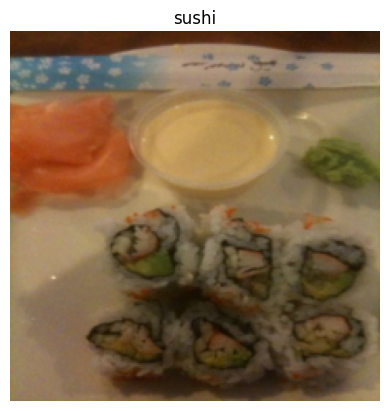

In [11]:
# Plot the image with matplotlib
import matplotlib.pyplot as plt

plt.imshow(image.permute(1, 2, 0)) # (color_channels, height, width) -> (height, width, color_channels)
plt.title(class_names[label])
plt.axis(False);

## 3. Replicating ViT: Overview

Looking at a whole machine learning research paper can be imtimidating.

So in order to make it more understandable, we can break it down into smaller pieces:

* **Inputs** - What goes into the model? (in our case, image tensors)
* **Outputs** - What comes out of the model/layer/block? (in our case, we want the model to output image classification labels)
* **Layers** - Takes an input, manipulates it with a function (for example could be self-attention).
* **Blocks** - A collection of layers.
* **Model (or architecture)** - A collection of blocks.

### 3.1 ViT overview: pieces of the puzzle

* Figure 1: Visual overview of the architecture
* Four equations: math equations which define the functions of each layer/block
* Table 1/3: different hyperparameters for the architecture/training.
* Text descriptions (especially section 3.1)



### Figure 1

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/08-vit-paper-figure-1-architecture-overview.png" width=600 alt="figure 1 from vision transformer paper"/>

* Embedding = learnable representation (start with random numbers and improve over time) 



### Four equations

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/08-vit-paper-four-equations.png" width=600 alt="four equations from vision transformer paper"/>

#### Section 3.1 describes the various equations:

**Equation 1:**
An overview of the model is depicted in Figure 1. The standard Transformer receives as input a 1D sequence of token embeddings. To handle $2 \mathrm{D}$ images, we reshape the image $\mathbf{x} \in \mathbb{R}^{H \times W \times C}$ into a sequence of flattened $2 \mathrm{D}$ patches $\mathbf{x}_{p} \in \mathbb{R}^{N \times\left(P^{2} \cdot C\right)}$, where $(H, W)$ is the resolution of the original image, $C$ is the number of channels, $(P, P)$ is the resolution of each image patch, and $N=H W / P^{2}$ is the resulting number of patches, which also serves as the effective input sequence length for the Transformer. The Transformer uses constant latent vector size $D$ through all of its layers, so we flatten the patches and map to $D$ dimensions with a trainable linear projection (Eq. 1). We refer to the output of this projection as the patch embeddings.

**Equation 1:**
Position embeddings are added to the patch embeddings to retain positional information. We use standard learnable $1 \mathrm{D}$ position embeddings, since we have not observed significant performance gains from using more advanced 2D-aware position embeddings (Appendix D.4). The resulting sequence of embedding vectors serves as input to the encoder.

In pseudocode:

```python
# Equation 1
x_input = [class_token, image_patch_1, image_patch_2, ... image_patch_N] + [class_token_pos, image_patch_1_pos, image_patch_2_pos, ... image_patch_N_pos]
```



---

**Equations 2&3:**
The Transformer encoder (Vaswani et al., 2017) consists of alternating layers of multiheaded selfattention (MSA, see Appendix A) and MLP blocks (Eq. 2, 3). Layernorm (LN) is applied before every block, and residual connections after every block (Wang et al., 2019; Baevski \& Auli, 2019).

In pseudocode:

```python
# Equation 2 
x_output_MSA_block = MSA_layer(LN_layer(x_input)) + x_input

# Equation 3 
x_output_MLP_block = MLP_layer(LN_layer(x_output_MSA_block)) + x_output_MSA_block 
```
---


**Equation 4:**
Similar to BERT's [ class ] token, we prepend a learnable embedding to the sequence of embedded patches $\left(\mathbf{z}_{0}^{0}=\mathbf{x}_{\text {class }}\right)$, whose state at the output of the Transformer encoder $\left(\mathbf{z}_{L}^{0}\right)$ serves as the image representation y (Eq. 4). Both during pre-training and fine-tuning, a classification head is attached to $\mathbf{z}_{L}^{0}$. The classification head is implemented by a MLP with one hidden layer at pre-training time and by a single linear layer at fine-tuning time.

* MLP = multilayer perceptron = a neural network with X number of layers
* MLP = one hidden layer at training time
* MLP = single linear layer at fine-tuning time 

In pseudocode:

```python
# Equation 4
y = Linear_layer(LN_layer(x_output_MLP_block)) 
```

### Table 1 

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/08-vit-paper-table-1.png" width=600 alt="table 1 from vision transformer paper"/>

* ViT-Base, ViT-Large and ViT-Huge are all different sizes of the same model architecture
* ViT-B/16 = ViT-Base with image patch size 16x16 
* Layers - the number of transformer encoder layers 
* Hidden size $D$ - the embedding size throughout the architecture
* MLP size - the number of hidden units/neurons in the MLP
* Heads - the number of multi-head self-attention 


## 4. Equation 1: Split data into patches and creating the class, position and patch embedding

Layers = input -> function -> output

What's the input shape?

What's the output shape?

* Input shape: (224, 224, 3) -> single image -> (height, width, color channels)
* Output shape: ???

### 4.1 Calculate input and output shapes by hand

> **Equation 1:**
An overview of the model is depicted in Figure 1. The standard Transformer receives as input a 1D sequence of token embeddings. To handle $2 \mathrm{D}$ images, we reshape the image $\mathbf{x} \in \mathbb{R}^{H \times W \times C}$ into a sequence of flattened $2 \mathrm{D}$ patches $\mathbf{x}_{p} \in \mathbb{R}^{N \times\left(P^{2} \cdot C\right)}$, where $(H, W)$ is the resolution of the original image, $C$ is the number of channels, $(P, P)$ is the resolution of each image patch, and $N=H W / P^{2}$ is the resulting number of patches, which also serves as the effective input sequence length for the Transformer. The Transformer uses constant latent vector size $D$ through all of its layers, so we flatten the patches and map to $D$ dimensions with a trainable linear projection (Eq. 1). We refer to the output of this projection as the patch embeddings.

> **Equation 1:**
Position embeddings are added to the patch embeddings to retain positional information. We use standard learnable $1 \mathrm{D}$ position embeddings, since we have not observed significant performance gains from using more advanced 2D-aware position embeddings (Appendix D.4). The resulting sequence of embedding vectors serves as input to the encoder.

* Input shape: $H\times{W}\times{C}$ (height x width x color channels)
* Output shape: ${N \times\left(P^{2} \cdot C\right)}$
* H = height
* W = width
* C = color channels
* P = patch size
* N = number of patches = (height * width) / p^2
* D = constant latent vector size = embedding dimension (see Table 1)


In [12]:
# Create example values
height = 224
width = 224
color_channels = 3
patch_size = 16 

# Calculate the number of patches
number_of_patches = int((height * width) / patch_size**2)
number_of_patches

196

In [13]:
# Input shape
embedding_layer_input_shape = (height, width, color_channels)             # H , W , C

# Output shape
embedding_layer_output_shape = (number_of_patches, patch_size**2 * color_channels) # N , P^2 x C

print(f"Input shape (single 2D image): {embedding_layer_input_shape}")
print(f"Output shape (single 1D sequence of patches): {embedding_layer_output_shape} -> (number_of_patches, embedding_dimension)")

Input shape (single 2D image): (224, 224, 3)
Output shape (single 1D sequence of patches): (196, 768) -> (number_of_patches, embedding_dimension)


### 4.2 Turning a single image into patches


Let's *visualize, visualize, visualize!*

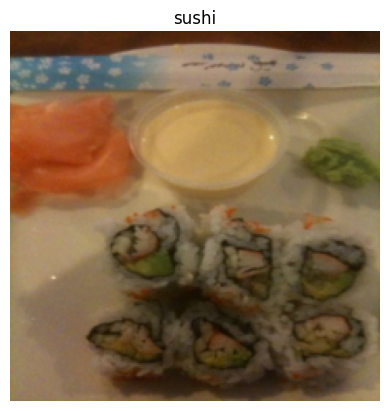

In [14]:
# View a single image
plt.imshow(image.permute(1, 2, 0))
plt.title(class_names[label])
plt.axis(False);

In [15]:
image.shape # 來自 2.3章

torch.Size([3, 224, 224])

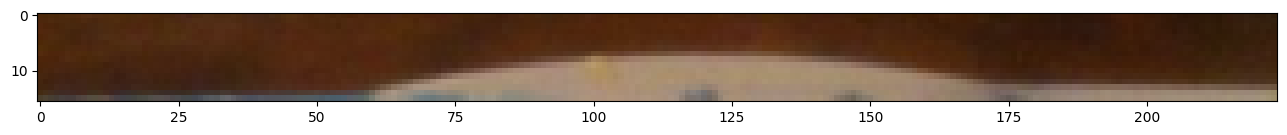

In [16]:
# Get the top row of the image
image_permuted = image.permute(1, 2, 0) # convert image to color channels last (H, W, C)

# Index to plot the top row of pixels
patch_size = 16
plt.figure(figsize=(patch_size, patch_size))
plt.imshow(image_permuted[:patch_size, :, :]) # 對應到 0~16, 0~224, 0~3

Number of patches per row: 14.0
Patch size: 16 pixels x 16 pixels


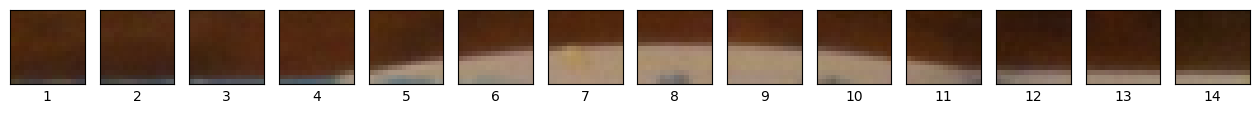

In [17]:
# Setup code to plot top row as patches
img_size = 224
patch_size = 16
num_patches = img_size/patch_size # 針對top row而已，不是針對整張圖
assert img_size % patch_size == 0, "Image size must be divisible by patch size"
print(f"Number of patches per row: {num_patches}\nPatch size: {patch_size} pixels x {patch_size} pixels")

# Create a series of subplots
fig, axs = plt.subplots(nrows=1,
              ncols=img_size // patch_size, # one column for each patch
              sharex=True,
              sharey=True,
              figsize=(patch_size, patch_size)
              )

# Iterate through number of patches in the top row
for i, patch in enumerate(range(0, img_size, patch_size)):
  axs[i].imshow(image_permuted[:patch_size, patch:patch+patch_size, :]); # 最後 `:' 等於 `0:3'
  axs[i].set_xlabel(i+1) # set the patch label
  axs[i].set_xticks([])
  axs[i].set_yticks([])

In [18]:
# for patch in range(0, img_size, patch_size):
#   print(patch)

Number of patches per row: 14.0  
Number of patches per column: 14.0  
Total patches: 196.0  
Patch size: 16 pixels x 16 pixels


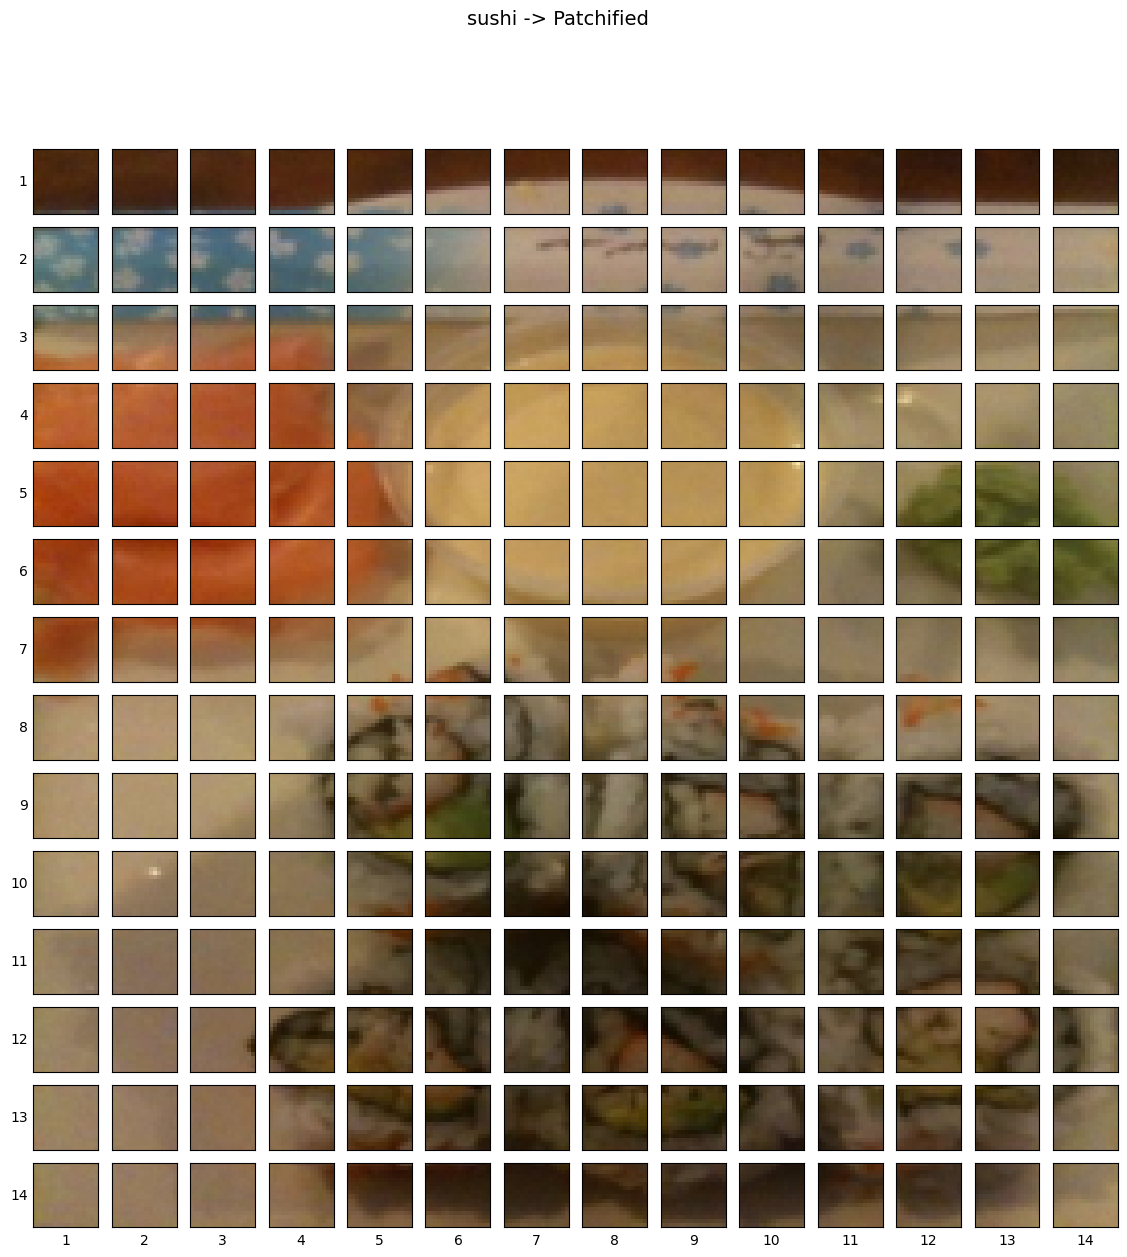

In [19]:
# Setup code to plot whole image as patches
img_size = 224
patch_size = 16
num_patches = img_size/patch_size 
assert img_size % patch_size == 0, "Image size must be divisible by patch size"
print(f"Number of patches per row: {num_patches}\
  \nNumber of patches per column: {num_patches}\
  \nTotal patches: {num_patches*num_patches}\
  \nPatch size: {patch_size} pixels x {patch_size} pixels")

# Create a series of subplots
fig, axs = plt.subplots(nrows=img_size // patch_size,
              ncols=img_size // patch_size,
              figsize=(num_patches, num_patches),
              sharex=True,
              sharey=True)

# Loop through height and width of image
for i, patch_height in enumerate(range(0, img_size, patch_size)): # iterate through height
  for j, patch_width in enumerate(range(0, img_size, patch_size)):
    # Plot the permuted image on the different axes 
    axs[i, j].imshow(image_permuted[patch_height:patch_height+patch_size, # iterate through height
                      patch_width:patch_width+patch_size, # iterate through width
                      :]) # get all color channels
    # Set up label information for each subplot (patch)
    axs[i, j].set_ylabel(i+1,
                rotation="horizontal",
                horizontalalignment="right",
                verticalalignment="center")
    axs[i, j].set_xlabel(j+1)
    axs[i, j].set_xticks([])
    axs[i, j].set_yticks([])
    axs[i, j].label_outer()  # 沒有label_outer()，則每張圖的xlabel與ylabel都會顯示

# Set up a title for the plot
fig.suptitle(f"{class_names[label]} -> Patchified", fontsize=14)
plt.show()

### 4.3 Creating image patches and turning them into patch embeddings

Perhaps we could create the image patches and image patch embeddings in a single step using `torch.nn.Conv2d()` and setting the kernel size and stride parameters to `patch_size`. 



In [20]:
# Create conv2d layer to turn image into patches of learnable feature maps (embeddings)
from torch import nn

# Set the patch size 
patch_size = 16

# Create a conv2d lyaer with hyperparameters from the ViT paper
conv2d = nn.Conv2d(in_channels=3, # for color images
           out_channels=768, # D size from Table 1 for ViT-Base
           kernel_size=patch_size,
           stride=patch_size,
           padding=0)
conv2d

Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))

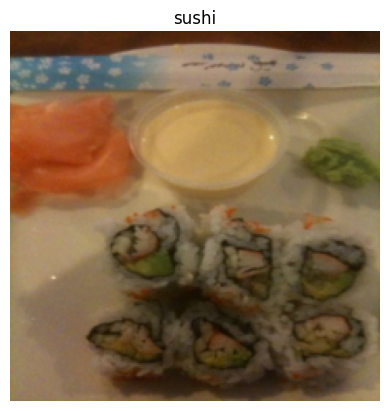

In [21]:
# View single image
plt.imshow(image.permute(1, 2, 0))
plt.title(class_names[label])
plt.axis(False);

In [22]:
image.unsqueeze(0).shape

torch.Size([1, 3, 224, 224])

In [23]:
# Pass the image through the convolutional layer
image_out_of_conv = conv2d(image.unsqueeze(0)) # add batch dimension -> (batch_size, color_channels, height, width)
print(image_out_of_conv.shape) 

torch.Size([1, 768, 14, 14])


In [24]:
image_out_of_conv.requires_grad

True

Now we've passed a single image to our `conv2d` layer, it's shape is: 

```python
torch.Size([1, 768, 14, 14]) # [batch_size, embedding_dim, feature_map_height, feature_map_width] 
```

In [25]:
# image.shape

In [26]:
# ti = image_out_of_conv[:, 200, :, :]
# tid = ti.permute(1,2,0).detach()
# tin = tid.numpy()
# type(ti), type(tid), type(tin)

Showing random convolutional feature maps from indexes: [608, 630, 148, 96, 755]


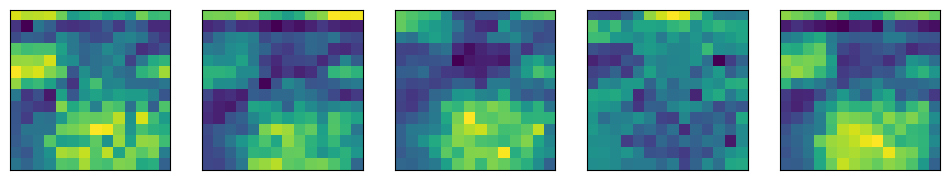

In [27]:
# plot random convolutional feature maps (embeddings)
import random
random_indexes = random.sample(range(0, 768), k=5)
print(f"Showing random convolutional feature maps from indexes: {random_indexes}")

# Create plot 
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(12, 12))

# Plot random image feature maps
for i, idx in enumerate(random_indexes):
  image_conv_feature_map = image_out_of_conv[:, idx, :, :] # index on the output tensor of the conv2d layer
  axs[i].imshow(image_conv_feature_map.squeeze().detach().numpy()) # remove batch dimension, and remove from grad tracking/switch to numpy for matplotlib
  # detach()是必要的，numpy()不是必要的
  axs[i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

In [28]:
# Get a single feature map in tensor form
single_feature_map = image_out_of_conv[:, 0, :, :] 
single_feature_map, single_feature_map.requires_grad, single_feature_map.shape

(tensor([[[ 5.0189e-02,  1.7461e-02,  1.4787e-02,  1.2912e-02, -5.2821e-02,
           -6.0531e-02, -8.8467e-02, -1.1514e-01, -9.7071e-02, -5.7381e-02,
            1.9365e-02,  9.8863e-03,  7.6490e-03, -6.6557e-03],
          [-1.9177e-01, -1.7558e-01, -1.3393e-01, -1.9562e-01, -1.2951e-01,
           -1.2117e-01, -1.0102e-01, -9.9899e-02, -7.4569e-02, -5.4988e-02,
           -8.7435e-02, -1.0234e-01, -8.7810e-02, -1.0965e-01],
          [-9.7653e-04, -1.3020e-03,  2.0329e-02,  7.5851e-02,  3.2874e-03,
           -3.5002e-03, -3.1062e-02, -2.6632e-02, -4.1815e-02, -3.7489e-02,
           -6.2036e-03, -2.6979e-02, -3.9000e-02, -7.5137e-02],
          [ 8.2792e-02,  8.5465e-02,  1.0383e-01,  7.8042e-02, -1.4042e-02,
           -4.3467e-02, -7.3699e-02, -6.5030e-02, -4.2387e-02, -7.4283e-02,
           -9.7940e-02, -1.1187e-01, -7.1575e-02, -8.8651e-02],
          [ 1.5429e-01,  1.3479e-01,  1.4695e-01,  1.0915e-01,  5.2581e-02,
           -5.5201e-02, -5.8694e-02, -5.9972e-02, -5.5096e-0

### 4.4 Flattening the patch embedding with `torch.nn.Flatten()`

Right now we've a series of convolutional feature maps (patch embeddings) that we want to flatten into a sequence of patch embeddings to satisfy the input criteria of the ViT Transformer Encoder.

In [29]:
print(f"{image_out_of_conv.shape} -> (batch_size, embedding_dim, feature_map_height, feature_map_width)")

torch.Size([1, 768, 14, 14]) -> (batch_size, embedding_dim, feature_map_height, feature_map_width)


Want: (batch_size, number_of_patches, embedding_dim)

In [30]:
from torch import nn
flatten_layer = nn.Flatten(start_dim=2,
               end_dim=3)

flatten_layer(image_out_of_conv).shape

torch.Size([1, 768, 196])

Original image shape: torch.Size([3, 224, 224])
Image feature map (patches) shape: torch.Size([1, 768, 14, 14])
Flattened image feature map shape: torch.Size([1, 768, 196])


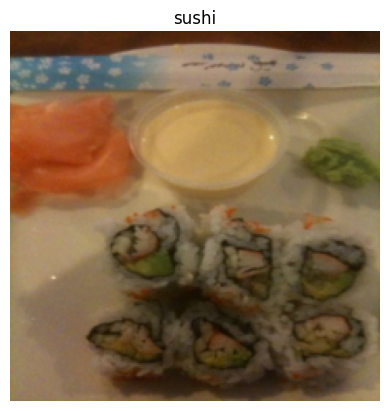

In [31]:
# Put everything together
plt.imshow(image.permute(1, 2, 0))
plt.title(class_names[label])
plt.axis(False)
print(f"Original image shape: {image.shape}")

# Turn image into feature maps
image_out_of_conv = conv2d(image.unsqueeze(0)) # add batch dimension
print(f"Image feature map (patches) shape: {image_out_of_conv.shape}")

# Flatten the feature maps
image_out_of_conv_flattened = flatten_layer(image_out_of_conv)
print(f"Flattened image feature map shape: {image_out_of_conv_flattened.shape}")

In [32]:
# Rearrange output of flattened layer
image_out_of_conv_flattened_permuted = image_out_of_conv_flattened.permute(0, 2, 1)
print(f"{image_out_of_conv_flattened_permuted.shape} -> (batch_size, number_of_patches, embedding_dimension)")

torch.Size([1, 196, 768]) -> (batch_size, number_of_patches, embedding_dimension)


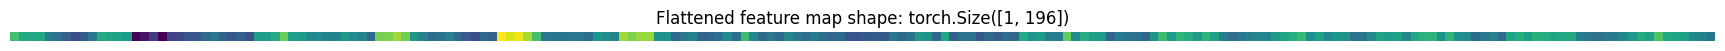

In [33]:
# Get a single flattened feature map
single_flattened_feature_map = image_out_of_conv_flattened_permuted[:, :, 0]

# Plot the flattened feature map visually
plt.figure(figsize=(22, 22))
plt.imshow(single_flattened_feature_map.detach().numpy())
plt.title(f"Flattened feature map shape: {single_flattened_feature_map.shape}")
plt.axis(False); 

In [34]:
# See the flattened feature map as a tensor
single_flattened_feature_map, single_flattened_feature_map.requires_grad, single_flattened_feature_map.shape

(tensor([[ 5.0189e-02,  1.7461e-02,  1.4787e-02,  1.2912e-02, -5.2821e-02,
          -6.0531e-02, -8.8467e-02, -1.1514e-01, -9.7071e-02, -5.7381e-02,
           1.9365e-02,  9.8863e-03,  7.6490e-03, -6.6557e-03, -1.9177e-01,
          -1.7558e-01, -1.3393e-01, -1.9562e-01, -1.2951e-01, -1.2117e-01,
          -1.0102e-01, -9.9899e-02, -7.4569e-02, -5.4988e-02, -8.7435e-02,
          -1.0234e-01, -8.7810e-02, -1.0965e-01, -9.7653e-04, -1.3020e-03,
           2.0329e-02,  7.5851e-02,  3.2874e-03, -3.5002e-03, -3.1062e-02,
          -2.6632e-02, -4.1815e-02, -3.7489e-02, -6.2036e-03, -2.6979e-02,
          -3.9000e-02, -7.5137e-02,  8.2792e-02,  8.5465e-02,  1.0383e-01,
           7.8042e-02, -1.4042e-02, -4.3467e-02, -7.3699e-02, -6.5030e-02,
          -4.2387e-02, -7.4283e-02, -9.7940e-02, -1.1187e-01, -7.1575e-02,
          -8.8651e-02,  1.5429e-01,  1.3479e-01,  1.4695e-01,  1.0915e-01,
           5.2581e-02, -5.5201e-02, -5.8694e-02, -5.9972e-02, -5.5096e-02,
          -5.6727e-02, -7

In [35]:
# single_flattened_feature_map.shape

### 4.5 Turning the ViT patch embedding layer into a PyTorch module

We want this module to do a few things:
1. Create a class called `PatchEmbedding` that inherits from `nn.Module`.
2. Initialize with appropriate hyperparameters, such as channels, embedding dimension, patch size.
3. Create a layer to turn an image into embedded patches using `nn.Conv2d()`.
4. Create a layer to flatten the feature maps of the output of the layer in 3.
5. Define a `foward()` that defines the forward computation (e.g. pass through layer from 3 and 4).
6. Make sure the output shape of the layer reflects the required output shape of the patch embedding.

In [36]:
# 1. Create a class called PatchEmbedding
class PatchEmbedding(nn.Module):
  # 2. Initilaize the layer with appropriate hyperparameters
  def __init__(self,
         in_channels:int=3,
         patch_size:int=16,
         embedding_dim:int=768): # from Table 1 for ViT-Base
    super().__init__()

    self.patch_size = patch_size
  
    # 3. Create a layer to turn an image into embedded patches
    self.patcher = nn.Conv2d(in_channels=in_channels,
                  out_channels=embedding_dim,
                  kernel_size=patch_size,
                  stride=patch_size,
                  padding=0)
    
    # 4. Create a layer to flatten feature map outputs of Conv2d
    self.flatten = nn.Flatten(start_dim=2,
                   end_dim=3)
    
  # 5. Define a forward method to define the forward computation steps
  def forward(self, x):
    # Create assertion to check that inputs are the correct shape
    image_resolution = x.shape[-1]        # x:[1, 3, 224, 224], x的最後一維:224
    assert image_resolution % patch_size == 0, f"Input image size must be divisible by patch size, image shape: {image_resolution}, patch size: {self.patch_size}"

    # Perform the forward pass
    x_patched = self.patcher(x) 
    x_flattened = self.flatten(x_patched)
    # 6. Make the returned sequence embedding dimensions are in the right order (batch_size, number_of_patches, embedding_dimension)
    return x_flattened.permute(0, 2, 1)


In [37]:
set_seeds()

# Create an instance of patch embedding layer
patchify = PatchEmbedding(in_channels=3,
               patch_size=16,
               embedding_dim=768)

# Pass a single image through patch embedding layer
print(f"Input image size: {image.unsqueeze(0).shape}")
patch_embedded_image = patchify(image.unsqueeze(0)) # add an extra batch dimension
print(f"Output patch embedding sequence shape: {patch_embedded_image.shape}")

Input image size: torch.Size([1, 3, 224, 224])
Output patch embedding sequence shape: torch.Size([1, 196, 768])


In [38]:
# image.shape, image.unsqueeze(0).shape, image.unsqueeze(0).shape[-1]

In [39]:
rand_image_tensor = torch.randn(1, 3, 224, 224)
rand_image_tensor_bad = torch.randn(1, 3, 250, 250)

# patchify(rand_image_tensor_bad)

In [40]:
# Create random input sizes
random_input_image = (1, 3, 224, 224)
random_input_image_error = (1, 3, 250, 250) # will error because image size is incompatible with patch_size

# # Get a summary of the input and outputs of PatchEmbedding (uncomment for full output)
summary(PatchEmbedding(), 
    input_size=random_input_image, # try swapping this for "random_input_image_error" 
    col_names=["input_size", "output_size", "num_params", "trainable"],
    col_width=20,
    row_settings=["var_names"])

/usr/local/lib/python3.10/dist-packages/torchinfo/torchinfo.py:477: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  action_fn=lambda data: sys.getsizeof(data.storage()),
/usr/local/lib/python3.10/dist-packages/torch/storage.py:665: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  


Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
PatchEmbedding (PatchEmbedding)          [1, 3, 224, 224]     [1, 196, 768]        --                   True
├─Conv2d (patcher)                       [1, 3, 224, 224]     [1, 768, 14, 14]     590,592              True
├─Flatten (flatten)                      [1, 768, 14, 14]     [1, 768, 196]        --                   --
Total params: 590,592
Trainable params: 590,592
Non-trainable params: 0
Total mult-adds (M): 115.76
Input size (MB): 0.60
Forward/backward pass size (MB): 1.20
Params size (MB): 2.36
Estimated Total Size (MB): 4.17

In [41]:
# 也可以用patchify(實例)
# summary(patchify, 
#     input_size=random_input_image, # try swapping this for "random_input_image_error" 
#     col_names=["input_size", "output_size", "num_params", "trainable"],
#     col_width=20,
#     row_settings=["var_names"])

### 4.6 Creating the class token embedding

Want to: prepend a learnable class token to the start of the patch embedding.

In [42]:
patch_embedded_image # torch.Size([1, 196, 768]) # 來自 4.5章

tensor([[[-0.2353,  0.0450, -0.1027,  ...,  0.0970, -0.0964,  0.0621],
         [-0.2596,  0.0622, -0.0963,  ...,  0.0924, -0.0892,  0.0562],
         [-0.2569,  0.0717, -0.1173,  ...,  0.1288, -0.1058,  0.0384],
         ...,
         [-0.2755,  0.0199, -0.1343,  ...,  0.1764, -0.1016,  0.1279],
         [-0.4043,  0.1069, -0.1516,  ...,  0.3183, -0.1780,  0.1140],
         [-0.5619,  0.1063, -0.1451,  ...,  0.3969, -0.2455,  0.2172]]],
       grad_fn=<PermuteBackward0>)

In [43]:
# Get the batch size and embedding dimension
batch_size = patch_embedded_image.shape[0]        # 第一維
embedding_dimension = patch_embedded_image.shape[-1]   # 最後一維
batch_size, embedding_dimension

(1, 768)

In [44]:
# View the patch embedding shape
print(f"Patch embedding shape: {patch_embedded_image.shape} -> [batch_size, number_of_patches, embedding_dimension]")

Patch embedding shape: torch.Size([1, 196, 768]) -> [batch_size, number_of_patches, embedding_dimension]


In [45]:
# Create the class token embedding as a learnable parameter that shares the same size as the embedding dimension (D)
class_token = nn.Parameter(torch.ones(batch_size, 1, embedding_dimension), # [batch_size, number_of_tokens, embedding_dimension]
                           requires_grad=True) # make sure the embedding is learnable

# Show the first 10 examples of the class_token
print(class_token[:, :, :10])

# Print the class_token shape
print(f"Class token shape: {class_token.shape} -> [batch_size, number_of_tokens, embedding_dimension]")

tensor([[[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]], grad_fn=<SliceBackward0>)
Class token shape: torch.Size([1, 1, 768]) -> [batch_size, number_of_tokens, embedding_dimension]


In [46]:
# Add the class token embedding to the front of the patch embedding 
patch_embedded_image_with_class_embedding = torch.cat((class_token, patch_embedded_image),
                               dim=1) # number_of_patches dimension

print(patch_embedded_image_with_class_embedding)
print(f"Sequence of patch embeddings with class token prepended shape: {patch_embedded_image_with_class_embedding.shape} -> (batch_size, class_token + number_of_patches, embedding_dim)")

tensor([[[ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
         [-0.2353,  0.0450, -0.1027,  ...,  0.0970, -0.0964,  0.0621],
         [-0.2596,  0.0622, -0.0963,  ...,  0.0924, -0.0892,  0.0562],
         ...,
         [-0.2755,  0.0199, -0.1343,  ...,  0.1764, -0.1016,  0.1279],
         [-0.4043,  0.1069, -0.1516,  ...,  0.3183, -0.1780,  0.1140],
         [-0.5619,  0.1063, -0.1451,  ...,  0.3969, -0.2455,  0.2172]]],
       grad_fn=<CatBackward0>)
Sequence of patch embeddings with class token prepended shape: torch.Size([1, 197, 768]) -> (batch_size, class_token + number_of_patches, embedding_dim)


In [47]:
# a= torch.ones(1,2,3)
# b= torch.ones(1,1,3)
# c = torch.cat((a,b),dim=1)

In [48]:
# cp = nn.Parameter(c, requires_grad=True)

### 4.7 Creating the position embedding

Want to: create a series of 1D learnable position embeddings and to add them to the sequence of patch embeddings.

In [49]:
# Calculate N (number_of_patches)
number_of_patches = int((height * width) / patch_size**2)

# Get the embedding dimension
embedding_dimension = patch_embedded_image_with_class_embedding.shape[-1]

# Create the learnable 1D position embedding
position_embedding = nn.Parameter(torch.ones(1,
                         number_of_patches+1,   # 196+1
                         embedding_dimension),   # 768
                   requires_grad=True)

position_embedding, position_embedding.shape

(Parameter containing:
 tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]], requires_grad=True),
 torch.Size([1, 197, 768]))

In [50]:
# View the sequence of patch embeddings with the prepended class embedding
patch_embedded_image_with_class_embedding, patch_embedded_image_with_class_embedding.shape

(tensor([[[ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
          [-0.2353,  0.0450, -0.1027,  ...,  0.0970, -0.0964,  0.0621],
          [-0.2596,  0.0622, -0.0963,  ...,  0.0924, -0.0892,  0.0562],
          ...,
          [-0.2755,  0.0199, -0.1343,  ...,  0.1764, -0.1016,  0.1279],
          [-0.4043,  0.1069, -0.1516,  ...,  0.3183, -0.1780,  0.1140],
          [-0.5619,  0.1063, -0.1451,  ...,  0.3969, -0.2455,  0.2172]]],
        grad_fn=<CatBackward0>),
 torch.Size([1, 197, 768]))

In [51]:
# Add the position embedding to the patch and class token embedding
patch_and_position_embedding = patch_embedded_image_with_class_embedding + position_embedding
print(patch_and_position_embedding)
print(f"Patch and position embedding shape: {patch_and_position_embedding.shape}")

tensor([[[2.0000, 2.0000, 2.0000,  ..., 2.0000, 2.0000, 2.0000],
         [0.7647, 1.0450, 0.8973,  ..., 1.0970, 0.9036, 1.0621],
         [0.7404, 1.0622, 0.9037,  ..., 1.0924, 0.9108, 1.0562],
         ...,
         [0.7245, 1.0199, 0.8657,  ..., 1.1764, 0.8984, 1.1279],
         [0.5957, 1.1069, 0.8484,  ..., 1.3183, 0.8220, 1.1140],
         [0.4381, 1.1063, 0.8549,  ..., 1.3969, 0.7545, 1.2172]]],
       grad_fn=<AddBackward0>)
Patch and position embedding shape: torch.Size([1, 197, 768])


### 4.8 Putting it all together: from image to embedding

We've written code to turn an image into a flattened sequence of patch embeddings.

Now let's it all in one cell.

<font color="#7F00FF">

1. Setting the patch size (we'll use 16 as it's widely used throughout the paper and for ViT-Base).
2. Getting a single image, printing its shape and storing its height and width.
3. Adding a batch dimension to the single image so it's compatible with our PatchEmbedding layer.
4. Creating a `PatchEmbedding` layer (the one we made in section 4.5) with a patch_size=16 and embedding_dim=768 (from Table 1 for ViT-Base).
5. Passing the single image through the PatchEmbedding layer in 4 to create a sequence of patch embeddings.
6. Creating a class token embedding like in section 4.6.
7. Prepending the class token emebdding to the patch embeddings created in step 5.
8. Creating a position embedding like in section 4.7.
9. Adding the position embedding to the class token and patch embeddings created in step 7.
</font>

In [52]:
# Set seeds
set_seeds()

# 1. Set the patch size
patch_size = 16

# 2. Print shapes of the original image tensor and get the image dimensions
print(f"Image tensor shape: {image.shape}")
'''
[3, 224, 224]
'''
height, width = image.shape[1], image.shape[2]

# 3. Get image tensor and add a batch dimension
x = image.unsqueeze(0)
# x = torch.randn((3,3,224,224)) # 測試用
print(f"Input image shape: {x.shape}")
'''
[1, 3, 224, 224]
'''

# 4. Create patch embedding layer
patch_embedding_layer = PatchEmbedding(in_channels=3,
                      patch_size=patch_size, 
                      embedding_dim=768)

# 5. Pass input image through PatchEmbedding
patch_embedding = patch_embedding_layer(x)
print(f"Patch embedding shape: {patch_embedding.shape}")
'''
[1, 196, 768]
'''

# 6. Create class token embedding
batch_size = patch_embedding.shape[0]
embedding_dimension = patch_embedding.shape[-1]
class_token = nn.Parameter(torch.ones(batch_size, 1, embedding_dimension),
                           requires_grad=True) # make sure it's learnable
print(f"Class token embedding shape: {class_token.shape}")
'''
[1, 1, 768]
'''


# 7. Prepend the class token embedding to patch embedding
patch_embedding_class_token = torch.cat((class_token, patch_embedding), dim=1)
print(f"Patch embedding with class token shape: {patch_embedding_class_token.shape}")
'''
[1, 197, 768]
'''

# 8. Create position embedding
number_of_patches = int((height*width) / patch_size**2)
position_embedding = nn.Parameter(torch.ones(1, number_of_patches+1, embedding_dimension),
                                  requires_grad=True)
'''
注意：此時
patch_embedding_class_token.shape = [1, 197, 768]
position_embedding.shape = [1, 197, 768]
'''

# 9. Add the position embedding to patch embedding with class token
patch_and_position_embedding = patch_embedding_class_token + position_embedding
print(f"Patch and position embedding shape: {patch_and_position_embedding.shape} ")
'''
[1, 197, 768] + [1, 197, 768] = [1, 197, 768]
但是，若batch_size不是1，例如[32, 197, 768]
patch_embedding_class_token[32, 197, 768] + position_embedding[1, 197, 768] = ?
position_embedding 的第一維batch size會自動擴充為32，[32, 197, 768]
最後[32, 197, 768]+[32, 197, 768] = [32, 197, 768]

'''
#
print()

Image tensor shape: torch.Size([3, 224, 224])
Input image shape: torch.Size([1, 3, 224, 224])
Patch embedding shape: torch.Size([1, 196, 768])
Class token embedding shape: torch.Size([1, 1, 768])
Patch embedding with class token shape: torch.Size([1, 197, 768])
Patch and position embedding shape: torch.Size([1, 197, 768]) 



## <font color="red"> 5 </font>Equation 2: Multihead Self-Attention (MSA block)

* **Multihead self-attention** = which part of a sequence should pay the most attention to itself?
  * In our case, we have a series of **embedded image patches**, which patch significantly relates to another patch.
  * We want our neural network (ViT) to learn this relationship/representation.
* To replicate MSA in PyTorch we can use: https://pytorch.org/docs/stable/generated/torch.nn.MultiheadAttention.html 

* **LayerNorm** = Layer normalization (LayerNorm) is a technique to normalize the distributions of intermediate layers. It enables smoother gradients, faster training, and better generalization accuracy.
  * Normalization = make everything have the same mean and same standard deviation.
  * In PyTorch = https://pytorch.org/docs/stable/generated/torch.nn.LayerNorm.html, normalizes values over $D$ dimension, in our case, the $D$ dimension is the embedding dimension. 
    * When we normalize along the embedding dimension, it's like making all of the stairs in a staircase the same size.

In [74]:
class MultiHeadSelfAttentionBlock(nn.Module): 
  """Creates a multi-head self-attention block ("MSA block" for short).
  """
  def __init__(self, 
          embedding_dim:int=768, # Hidden size D (embedding dimension) from Table 1 for ViT-Base
          num_heads:int=12, # Heads from Table 1 for ViT-Base
          attn_dropout:int=0):
    super().__init__()
    
    # Create the norm layer (LN)
    self.layer_norm = nn.LayerNorm(normalized_shape=embedding_dim)

    # Create multihead attention (MSA) layer
    self.multihead_attn = nn.MultiheadAttention(embed_dim=embedding_dim,
                             num_heads=num_heads,
                             dropout=attn_dropout, 
                             batch_first=True) # is the batch first? (batch, seq, feature) -> (batch, number_of_patches, embedding_dimension)
  
  def forward(self, x):
    x = self.layer_norm(x)
    attn_output, attn_output_weights = self.multihead_attn(query=x,
                         key=x,
                         value=x,
                         need_weights=True)
    # print(">",attn_output_weights) # attn_output_weights.shape是torch.Size([1, 197, 197])。但當need_weights＝False, 答案是None;
    return attn_output, attn_output_weights 

In [75]:
# Create an instance MSA block
multihead_self_attention_block = MultiHeadSelfAttentionBlock(embedding_dim=768,
                                  num_heads=12,
                                  attn_dropout=0)

# Pass the patch and position image embedding sequence through MSA block
patched_image_through_msa_block, Weights = multihead_self_attention_block(patch_and_position_embedding)
print(f"Input shape of MSA block: {patch_and_position_embedding.shape}")
print(f"Output shape of MSA block: {patched_image_through_msa_block.shape}")

# 顯示attn_output_weights
Weights.shape

Input shape of MSA block: torch.Size([1, 197, 768])
Output shape of MSA block: torch.Size([1, 197, 768])


torch.Size([1, 197, 197])

In [83]:
# summary(model=MultiHeadSelfAttentionBlock(),
#     input_size=(1, 197, 768), # (batch_size, color_channels, height, width)
#     col_names=["input_size", "output_size", "num_params", "trainable"],
#     col_width=20,
#     row_settings=["var_names"])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
MultiHeadSelfAttentionBlock (MultiHeadSelfAttentionBlock)    [1, 197, 768]        [1, 197, 768]        --                   True
├─LayerNorm (layer_norm)                                     [1, 197, 768]        [1, 197, 768]        1,536                True
├─MultiheadAttention (multihead_attn)                        --                   [1, 197, 768]        2,362,368            True
Total params: 2,363,904
Trainable params: 2,363,904
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.61
Forward/backward pass size (MB): 1.21
Params size (MB): 0.01
Estimated Total Size (MB): 1.82

## 6. Equation 3: Multilayer Perceptron (MLP block)

* **MLP** = The MLP contains two layers with a GELU non-linearity (section 3.1).
  * MLP = a quite broad term for a block with a series of layer(s), layers can be multiple or even only one hidden layer. 
  * Layers can mean: fully-connected, dense, linear, feed-forward, all are often similar names for the same thing. In PyTorch, they're often called `torch.nn.Linear()` and in TensorFlow they might be called `tf.keras.layers.Dense()`
  * GELU in PyTorch - https://pytorch.org/docs/stable/generated/torch.nn.GELU.html#torch.nn.GELU 
  * MLP number of hidden units = MLP Size in Table 1
* **Dropout** =  Dropout, when used, is applied after
every dense layer except for the the qkv-projections and directly after adding positional- to patch
embeddings. Hybrid models are trained with the exact setup as their ViT counterparts. 
  * Value for Dropout available in Table 3 

In pseudocode:

```python
# MLP
x = linear -> non-linear -> dropout -> linear -> dropout
```

In [76]:
class MLPBlock(nn.Module):
  def __init__(self,
          embedding_dim:int=768,
          mlp_size:int=3072,
          dropout:int=0.1):
    super().__init__()
    
    # Create the norm layer (LN) 
    self.layer_norm = nn.LayerNorm(normalized_shape=embedding_dim)

    # Create the MLP
    self.mlp = nn.Sequential(
        nn.Linear(in_features=embedding_dim,
             out_features=mlp_size),
        nn.GELU(),
        nn.Dropout(p=dropout),
        nn.Linear(in_features=mlp_size,
             out_features=embedding_dim),
        nn.Dropout(p=dropout) 
    )
  
  def forward(self, x):
    x = self.layer_norm(x) 
    x = self.mlp(x)
    return x
    # return self.mlp(self.layer_norm(x)) # same as above 

In [77]:
# Create an instance of MLPBlock
mlp_block = MLPBlock(embedding_dim=768,
            mlp_size=3072,
            dropout=0.1)

# Pass output the MSABlock through MLPBlock
patched_image_through_mlp_block = mlp_block(patched_image_through_msa_block)
print(f"Input shape of MLP block: {patched_image_through_msa_block.shape}")
print(f"Output shape of MLP block: {patched_image_through_mlp_block.shape}")

Input shape of MLP block: torch.Size([1, 197, 768])
Output shape of MLP block: torch.Size([1, 197, 768])


## 7. Creating the Transformer Encoder

The Transformer Encoder is a combination of alternating blocks of MSA (equation 2) and MLP (equation 3).

And there are residual connections between each block.

* Encoder = turn a sequence into learnable representation
* Decoder = go from learn representation back to some sort of sequence
* Residual connections = add a layer(s) input to its subsequent output, this enables the creation of deeper networks (prevents weights from getting too small)

In pseudocode:

```python
# Transformer Encoder
x_input -> MSA_block -> [MSA_block_output + x_input] -> MLP_block -> [MLP_block_output + MSA_block_output + x_input] -> ... 
```

### 7.1 Create a custom Transformer Encoder block 
<font color="red" size="5">自訂一個Transformer Encolder block: (一個 MSA block + 一個 MLP block)</fot> 

In [87]:
class TransformerEncoderBlock(nn.Module):
  def __init__(self,
          embedding_dim:int=768, # Hidden size D from table 1, 768 for ViT-Base
          num_heads:int=12, # from table 1
          mlp_size:int=3072, # from table 1
          mlp_dropout:int=0.1, # from table 3
          attn_dropout:int=0):
    super().__init__()

    # Create MSA block (equation 2)
    self.msa_block = MultiHeadSelfAttentionBlock(embedding_dim=embedding_dim,
                             num_heads=num_heads,
                             attn_dropout=attn_dropout)
    
    # Create MLP block (equation 3)
    self.mlp_block = MLPBlock(embedding_dim=embedding_dim, 
                   mlp_size=mlp_size,
                   dropout=mlp_dropout)
    
  def forward(self, x):

    # x = self.msa_block(x) + x #由於MultiHeadSelfAttentionBlock的return從一個物件改成兩個，此行需要被改成如下

    temp = self.msa_block(x)

    x = temp[0] + x # residual/skip connection for equation 2
    
    x = self.mlp_block(x) + x # residual/skip connection for equation 3
    return x 

<font color="red" size="5">建立一個Transformer Encoder block實例</font>

In [88]:
# Create an instance of TransformerEncoderBlock()
transformer_encoder_block = TransformerEncoderBlock()

# Get a summary using torchinfo.summary
summary(model=transformer_encoder_block,  # 或是model=TransformerEncoderBlock()也可以
        input_size=(1, 197, 768), # (batch_size, number_of_patches, embedding_dimension)
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

/usr/local/lib/python3.10/dist-packages/torchinfo/torchinfo.py:477: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  action_fn=lambda data: sys.getsizeof(data.storage()),
/usr/local/lib/python3.10/dist-packages/torch/storage.py:665: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  


Layer (type (var_name))                            Input Shape          Output Shape         Param #              Trainable
TransformerEncoderBlock (TransformerEncoderBlock)  [1, 197, 768]        [1, 197, 768]        --                   True
├─MultiHeadSelfAttentionBlock (msa_block)          [1, 197, 768]        [1, 197, 768]        --                   True
│    └─LayerNorm (layer_norm)                      [1, 197, 768]        [1, 197, 768]        1,536                True
│    └─MultiheadAttention (multihead_attn)         --                   [1, 197, 768]        2,362,368            True
├─MLPBlock (mlp_block)                             [1, 197, 768]        [1, 197, 768]        --                   True
│    └─LayerNorm (layer_norm)                      [1, 197, 768]        [1, 197, 768]        1,536                True
│    └─Sequential (mlp)                            [1, 197, 768]        [1, 197, 768]        --                   True
│    │    └─Linear (0)                     

In [ ]:
# 1. Create a class that inherits from nn.Module
class TransformerEncoderBlock(nn.Module):
    """Creates a Transformer Encoder block."""
    # 2. Initialize the class with hyperparameters from Table 1 and Table 3
    def __init__(self,
                 embedding_dim:int=768, # Hidden size D from Table 1 for ViT-Base
                 num_heads:int=12, # Heads from Table 1 for ViT-Base
                 mlp_size:int=3072, # MLP size from Table 1 for ViT-Base
                 mlp_dropout:float=0.1, # Amount of dropout for dense layers from Table 3 for ViT-Base
                 attn_dropout:float=0): # Amount of dropout for attention layers
        super().__init__()

        # 3. Create MSA block (equation 2)
        self.msa_block = MultiHeadSelfAttentionBlock(embedding_dim=embedding_dim,
                                  num_heads=num_heads,
                                  attn_dropout=attn_dropout)
        
        # 4. Create MLP block (equation 3)
        self.mlp_block =  MLPBlock(embedding_dim=embedding_dim,
                                   mlp_size=mlp_size,
                                   dropout=mlp_dropout)
        
    # 5. Create a forward() method  
    def forward(self, x):
        
        # 6. Create residual connection for MSA block (add the input to the output)
        x =  self.msa_block(x) + x 
        
        # 7. Create residual connection for MLP block (add the input to the output)
        x = self.mlp_block(x) + x 
        
        return x

In [ ]:
# Create an instance of TransformerEncoderBlock
transformer_encoder_block = TransformerEncoderBlock()

# Print an input and output summary of our Transformer Encoder (uncomment for full output)
summary(model=transformer_encoder_block,
        input_size=(1, 197, 768), # (batch_size, num_patches, embedding_dimension)
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

RuntimeError: ignored

<font color="red" size="5">建立一個Transformer Encolder layer: 使用PyTorch內建層

### 7.2 Create a Transformer Encoder layer with in-built PyTorch layers

So far we've created a transformer encoder by hand.

But because of how good the Transformer architecture is, PyTorch has implemented ready to use Transformer Encoder layers: https://pytorch.org/docs/stable/nn.html#transformer-layers 

We can create a Transformer Encoder with pure PyTorch layers: https://pytorch.org/docs/stable/generated/torch.nn.TransformerEncoderLayer.html#torch.nn.TransformerEncoderLayer 

In [ ]:
# Create the same as above with torch.nn.TransformerEncoderLayer()
torch_transformer_encoder_layer = nn.TransformerEncoderLayer(d_model=768, # embedding size from table 1
                                 nhead=12, # heads from table 1
                                 dim_feedforward=3072, # MLP size from table
                                 dropout=0.1,
                                 activation="gelu",
                                 batch_first=True,
                                 norm_first=True)

torch_transformer_encoder_layer

TransformerEncoderLayer(
  (self_attn): MultiheadAttention(
    (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
  )
  (linear1): Linear(in_features=768, out_features=3072, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (linear2): Linear(in_features=3072, out_features=768, bias=True)
  (norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  (norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  (dropout1): Dropout(p=0.1, inplace=False)
  (dropout2): Dropout(p=0.1, inplace=False)
)

In [ ]:
# Get a summary using torchinfo.summary
summary(model=torch_transformer_encoder_layer,
    input_size=(1, 197, 768), # (batch_size, number_of_patches, embedding_dimension)
    col_names=["input_size", "output_size", "num_params", "trainable"],
    col_width=20,
    row_settings=["var_names"])

Layer (type (var_name))                            Input Shape          Output Shape         Param #              Trainable
TransformerEncoderLayer (TransformerEncoderLayer)  [1, 197, 768]        [1, 197, 768]        7,087,872            True
Total params: 7,087,872
Trainable params: 7,087,872
Non-trainable params: 0
Total mult-adds (M): 0
Input size (MB): 0.61
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.61

Why spend all this time recreating the transformer encoder when we could've just made it with a single PyTorch layer?

Practice. Practice. Practice.

Now we know how things are implemented behind the scenes, we can tweak them if necessary.

What are the benefits of using a pre-built PyTorch layer?

* Less prone to errors (goes through a bunch of testing)
* Potential benefit of speed ups (performance boosts)

## 8. Putting it all together to create ViT
<font color="red" size="5">開始建立一個 ViT 模型 

In [ ]:
# class ViM(nn.Module):
#   def __init__(self, num_classes:int=1000):
#     super().__init__()

#   def forward(self, x): 
#     return x

In [ ]:
# rd = torch.randn(1, 3, 224, 224)
# vim = ViM()
# vim(rd)

tensor([[[[-0.3605, -1.0698,  0.7306,  ..., -1.1934, -1.5181, -1.1403],
          [ 1.1326,  0.3350,  0.5420,  ...,  1.0548, -0.3817, -0.8101],
          [-0.0824, -0.3545, -0.8537,  ..., -0.2986, -1.1514, -0.9332],
          ...,
          [-1.5230, -0.5418,  1.5886,  ..., -1.0506,  0.6005,  1.7382],
          [-1.1950,  1.2703,  0.7087,  ...,  0.7167, -1.0449, -1.0590],
          [-0.8941,  1.2332, -0.9900,  ..., -0.8734,  0.1205,  0.0890]],

         [[ 1.1428, -0.4622, -1.3045,  ...,  0.1773, -0.9008, -0.2537],
          [ 0.6792,  0.7260, -1.8925,  ..., -0.0624, -1.1100,  2.1845],
          [ 0.5550,  0.3563,  0.1218,  ..., -0.5677, -0.0121,  0.4653],
          ...,
          [ 0.8388,  0.2298, -1.2091,  ..., -0.2858, -0.6955,  0.7253],
          [ 0.8133, -0.9915,  0.0307,  ..., -0.4352,  0.3231,  0.3516],
          [-0.7724, -1.6389,  0.6870,  ..., -1.6430, -0.7007, -1.6461]],

         [[ 0.3851, -0.7303, -0.4339,  ...,  0.4151, -0.2409, -0.6853],
          [ 1.1649, -0.0937, -

In [ ]:
# (步驟1) Create a ViT class 
class ViT(nn.Module): 
  # (步驟2) Initialize the class with hyperparameters
  def __init__(self,
         img_size:int=224, # Table 3 from the ViT paper
         in_channels:int=3,
         patch_size:int=16, 
         num_transformer_layers:int=12, # Table 1 for "Layers" for ViT-Base
         embedding_dim:int=768, # Hidden size D from Table 1 for ViT-Base
         mlp_size:int=3072, # Table 1
         num_heads:int=12, # Table 1
         attn_dropout:int=0,
         mlp_dropout:int=0.1,
         embedding_dropout:int=0.1, # Dropout for patch and position embeddings
         num_classes:int=1000): # number of classes in our classification problem
    super().__init__()

    # (步驟3) Make an assertion that the image size is compatible with the patch size
    assert img_size % patch_size == 0,  f"Image size must be divisible by patch size, image: {img_size}, patch size: {patch_size}"

    # (步驟4) Calculate the number of patches (height * width/patch^2)
    self.num_patches = (img_size * img_size) // patch_size**2
    '''
    num_patches= (224*224)/16^2 = 196
    '''

    # (步驟5) Create learnable class embedding (needs to go at front of sequence of patch embeddings)
    self.class_embedding = nn.Parameter(data=torch.randn(1, 1, embedding_dim),
                                 requires_grad=True)
    '''
    class_embedding大小[1, 1, 768]
    '''

    # (步驟6) Create learnable position embedding 
    self.position_embedding = nn.Parameter(data=torch.randn(1, self.num_patches+1, embedding_dim))
    '''
    position_embedding大小[1, 1+196, 768]
    '''

    # (步驟7) Create embedding dropout value
    self.embedding_dropout = nn.Dropout(p=embedding_dropout)

    # (步驟8) Create patch embedding layer
    self.patch_embedding = PatchEmbedding(in_channels=in_channels,
                         patch_size=patch_size,
                         embedding_dim=embedding_dim)
    '''
    patch_embedding大小[1, 196, 768]
    '''
    
    # (步驟9) Create the Transformer Encoder block # Note: The "*" means "all"
    # 注意：沒有"*"，錯誤https://stackoverflow.com/questions/58656046/pytorch-nn-sequentiallist-typeerror-list-is-not-a-module-subclass
    self.transformer_encoder = nn.Sequential(*[TransformerEncoderBlock(embedding_dim=embedding_dim,
                                        num_heads=num_heads,
                                        mlp_size=mlp_size,
                                        mlp_dropout=mlp_dropout) for _ in range(num_transformer_layers)])
    '''
    輸出
    '''

    # (步驟10) Create classifier head
    self.classifier = nn.Sequential(
        nn.LayerNorm(normalized_shape=embedding_dim),
        nn.Linear(in_features=embedding_dim,
                  out_features=num_classes)
    )
  
  # (步驟11) Create a forward() method
  def forward(self, x):   # 見後面的實踐1：self就是實例vit，random_image_tensor就是 
    # (步驟12) Get the batch size
    batch_size = x.shape[0]
    '''
    x = [batch_size, 3, 224, 224]
    batch_size = x的第一個維度大小
    '''

    # (步驟13) Create class token embedding and expand it to match the batch size (equation 1)
    class_token = self.class_embedding.expand(batch_size, -1, -1) # "-1" means to infer the dimensions
    '''
    class_token = [1, 1, 768] -> [batch_size, 1, 768]
    '''
    
    # (步驟14)Create the patch embedding (equation 1)
    x = self.patch_embedding(x)
    '''
    patch_embedding = [batch_size, 196, 768]
    '''
    
    # (步驟15) Concat class token embedding and patch embedding (equation 1)
    x = torch.cat((class_token, x), dim=1) # (batch_size, number_of_patches, embedding_dim)
    '''
    x = [batch_size, 1, 768] 連接 [batch_size, 196, 768] = [batch_size, 197, 768]
    '''

    # (步驟16) Add position embedding to class token and patch embedding
    x = self.position_embedding + x
    '''
    x = [1, 197, 768](自動擴展) + [batch_size, 197, 768] = [batch_size, 197, 768]
    '''

    # (步驟17) Apply dropout to patch embedding ("directly after adding positional- to patch embeddings")
    x = self.embedding_dropout(x)

    # (步驟18) Pass position and patch embedding to Transformer Encoder (equation 2 & 3)
    x = self.transformer_encoder(x)
    '''
    x = [1, 197, 768]
    '''

    # (步驟19) Put 0th index logit through classifier (equation 4)
    x = self.classifier(x)
    
    return x 

In [ ]:
# Example of creating the class embedding and expanding over a batch dimension
batch_size=32
embedding_dim=768
class_embedding = nn.Parameter(data=torch.randn(1, 1, embedding_dim),requires_grad=True)  # create a single learnable class token

class_embedding_expanded = class_embedding.expand(batch_size, -1, -1) # expand the single learnable class token across the batch dimension

# Print out the change in shapes
print(class_embedding.shape)
print(class_embedding_expanded.shape)

torch.Size([1, 1, 768])
torch.Size([32, 1, 768])


In [ ]:
# 實踐1
set_seeds()

# Create a random image tensor with same shape as a single image
random_image_tensor = torch.randn(1, 3, 224, 224)

# Create an instance of ViT with the number of classes we're working with (pizza, steak and sushi)
vit = ViT(num_classes=len(class_names))

# Pass the random image tensor to our ViT instance
vit(random_image_tensor).shape # Vit的forward中，self就是實例vit，random_image_tensor就是

torch.Size([1, 197, 768])

### 8.1 Getting a visual summary of our ViT model

In [ ]:
from torchinfo import summary

summary(model=ViT(num_classes=len(class_names)),
        input_size=(1, 3, 224, 224), # (batch_size, color_channels, height, width)
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
ViT (ViT)                                                    [1, 3, 224, 224]     [1, 3]               152,064              True
├─PatchEmbedding (patch_embedding)                           [1, 3, 224, 224]     [1, 196, 768]        --                   True
│    └─Conv2d (patcher)                                      [1, 3, 224, 224]     [1, 768, 14, 14]     590,592              True
│    └─Flatten (flatten)                                     [1, 768, 14, 14]     [1, 768, 196]        --                   --
├─Dropout (embedding_dropout)                                [1, 197, 768]        [1, 197, 768]        --                   --
├─Sequential (transformer_encoder)                           [1, 197, 768]        [1, 197, 768]        --                   True
│    └─TransformerEncoderBlock (0)                           [1, 197, 768]        [1, 197, 768] 

In [ ]:
 # Number of parameters in pretrained ViT
num_params = 85,800,963
num_params

(85, 800, 963)

## 9. Setting up training code for our custom ViT

We've replicated the ViT architecture, now let's see how it performs on our FoodVision Mini data.

<font color="purple">Ok time for the easy part.
* Training!
* Why easy?
* Because we've got most of what we need ready to go, from our model (`vit`) to our DataLoaders (`train_dataloader`, `test_dataloader`) to the training functions we created in [05. PyTorch Going Modular section 4](https://www.learnpytorch.io/05_pytorch_going_modular/#4-creating-train_step-and-test_step-functions-and-train-to-combine-them).
* To train our model we can import the `train()` function from `going_modular.going_modular.engine`.
* All we need is a loss function and an optimizer.</font>



### 9.1 Creating an optimizer

The paper states it uses the Adam optimizer (section 4, Training & fine-tuning) with $B1$ value of 0.9, $B2$ of 0.999 (defaults) and a weight decay of 0.1.

Weight decay = Weight decay is a regularization technique by adding a small penalty, usually the L2 norm of the weights (all the weights of the model), to the loss function. 

Regularization technique = prevents overfitting.

<font color="purple">
Searching the ViT paper for "optimizer", section 4.1 on Training & Fine-tuning states:

> <font color="purple">**Training & Fine-tuning.** We train all models, including ResNets, using Adam (Kingma & Ba, 2015 ) with $\beta_{1}=0.9, \beta_{2}=0.999$, a batch size of 4096 and apply a high weight decay of $0.1$, which we found to be useful for transfer of all models (Appendix D.1 shows that, in contrast to common practices, Adam works slightly better than SGD for ResNets in our setting).

So we can see they chose to use the "Adam" optimizer (`torch.optim.Adam()`) rather than SGD (stochastic gradient descent, `torch.optim.SGD()`).
</font>

<font color="purple">The authors set Adam's $\beta$(beta) values to $\beta_{1}=0.9, \beta_{2}=0.999$, these are the default values for the `betas` parameter in `torch.optim.Adam(betas=(0.9, 0.999)`).

They also state the use of [weight decay](https://paperswithcode.com/method/weight-decay) (slowly reducing the values of the weights during optimization to prevent overfitting), we can set this with the `weight_decay` parameter in `torch.optim.Adam(weight_decay=0.3)` (according to the setting of ViT-* trained on ImageNet-1k).</font>

<font color="purple">We'll set the learning rate of the optimizer to 0.003 as per Table 3 (according to the setting of ViT-* trained on ImageNet-1k).

And as discussed previously, we're going to use a lower batch size than 4096 due to hardware limitations (if you have a large GPU, feel free to increase this).</font>


In [ ]:
# vit

### 9.2 Creating a loss function

The ViT paper doesn't actually mention what loss function they used.

So since it's a multi-class classification we'll use the `torch.nn.CrossEntropyLoss()`.

<font color="purple">
Strangely, searching the ViT paper for "loss" or "loss function" or "criterion" returns no results.

However, since the target problem we're working with is multi-class classification (the same for the ViT paper), we'll use `torch.nn.CrossEntropyLoss()`
</font>

### 9.3 Training our ViT Model

<font color="purple">Okay, now we know what optimizer and loss function we're going to use, let's setup the training code for training our ViT.

We'll start by importing the `engine.py` script from `going_modular.going_modular` then we'll setup the optimizer and loss function and finally we'll use the `train()` function from `engine.py` to train our ViT model for 10 epochs (we're using a smaller number of epochs than the ViT paper to make sure everything works).
</font>

In [ ]:
device

'cpu'

In [ ]:
from going_modular.going_modular import engine

# Set the seeds
set_seeds()

# Setup the optimizer to optimize our ViT model parameters using hyperparameters from the ViT paper 
optimizer = torch.optim.Adam(vit.parameters(), 
                lr=1e-3,  # Base LR from Table 3 for ViT-* ImageNet-1k
                betas=(0.9, 0.999), # default values but also mentioned in ViT paper section 4.1 (Training & Fine-tuning)
                weight_decay=0.1) # from the ViT paper section 4.1 (Training & Fine-tuning) and Table 3 for ViT-* ImageNet-1k

# Setup the loss function for multi-class classification
loss_fn = torch.nn.CrossEntropyLoss()

# Train the model and save the training results to a dictionary
results = engine.train(model=vit,
             train_dataloader=train_dataloader,
             test_dataloader=test_dataloader,
             epochs=10,
             optimizer=optimizer,
             loss_fn=loss_fn,
             device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 4.8769 | train_acc: 0.3008 | test_loss: 1.0393 | test_acc: 0.5417
Epoch: 2 | train_loss: 1.5149 | train_acc: 0.3047 | test_loss: 1.5086 | test_acc: 0.1979
Epoch: 3 | train_loss: 1.4133 | train_acc: 0.2617 | test_loss: 1.4602 | test_acc: 0.1979
Epoch: 4 | train_loss: 1.2590 | train_acc: 0.4102 | test_loss: 1.9580 | test_acc: 0.1979
Epoch: 5 | train_loss: 1.3003 | train_acc: 0.2812 | test_loss: 1.6453 | test_acc: 0.2604
Epoch: 6 | train_loss: 1.2523 | train_acc: 0.2969 | test_loss: 1.7505 | test_acc: 0.1979
Epoch: 7 | train_loss: 1.1795 | train_acc: 0.4102 | test_loss: 3.2499 | test_acc: 0.1979
Epoch: 8 | train_loss: 1.4590 | train_acc: 0.2852 | test_loss: 1.3793 | test_acc: 0.2604
Epoch: 9 | train_loss: 1.3395 | train_acc: 0.3672 | test_loss: 1.2891 | test_acc: 0.5417
Epoch: 10 | train_loss: 1.4096 | train_acc: 0.3164 | test_loss: 1.3273 | test_acc: 0.2604


<font color="purple">Wonderful!
* Our ViT model has come to life!
* Though the results on our pizza, steak and sushi dataset don't look too good.
* Perhaps it's because we're missing a few things?
</font>

### 9.4 What our training setup is missing

How is our training setup different to the ViT paper? 

We've replicated model archirecture correctly.

But what was different between our training procedure (to get such poor results) and the ViT paper training procedure to get such great results?

The main things our training implementation is missing: 

Prevent underfitting:
* Data - our setup uses far less data (225 vs millions)

Prevent overfitting: 
* Learning rate warmup - start with a low learning rate and increase to a base LR
* Learning rate decay - as your model gets closer to convergence, start to lower the learning rate 
* Gradient clipping - prevent gradients from getting too big 

Search "pytorch [technique name]" 

<font color="purple">The original ViT architecture achieves good results on several image classification benchmarks (on par or better than many state-of-the-art results when it was released).

However, our results (so far) aren't as good.
</font>

<font color="purple">There's a few reasons this could be but the main one is scale.

The original ViT paper uses a far larger amount of data than ours (in deep learning, more data is generally always a good thing) and a longer training schedule (see Table 3).
</font>

| **Hyperparameter value** | **ViT Paper** | **Our implementation** |
| ----- | ----- | ----- |
| Number of training images | 1.3M (ImageNet-1k), 14M (ImageNet-21k), 303M (JFT) | 225 |
| Epochs | 7 (for largest dataset), 90, 300 (for ImageNet) | 10 | 
| Batch size | 4096 | 32 |
| [Learning rate warmup](https://paperswithcode.com/method/linear-warmup) | 10k steps (Table 3) | None | 
| [Learning rate decay](https://medium.com/analytics-vidhya/learning-rate-decay-and-methods-in-deep-learning-2cee564f910b#:~:text=Learning%20rate%20decay%20is%20a,help%20both%20optimization%20and%20generalization.) | Linear/Cosine (Table 3) | None | 
| [Gradient clipping](https://paperswithcode.com/method/gradient-clipping) | Global norm 1 (Table 3) | None |

<font color="purple">Even though our ViT architecture is the same as the paper, the results from the ViT paper were achieved using far more data and a more elaborate training scheme than ours.

Because of the size of the ViT architecture and its high number of parameters (increased learning capabilities), and amount of data it uses (increased learning opportunities), many of the techniques used in the ViT paper training scheme such as learning rate warmup, learning rate decay and gradient clipping are specifically designed to [prevent overfitting](https://www.learnpytorch.io/04_pytorch_custom_datasets/#81-how-to-deal-with-overfitting) (regularization). 
</font>

> <font color="purple">**Note:** For any technique you're unsure of, you can often quickly find an example by searching "pytorch TECHNIQUE NAME", for exmaple, say you wanted to learn about learning rate warmup and what it does, you could search "pytorch learning rate warmup". 

Good news is, there are many pretrained ViT models (using vast amounts of data) available online, we'll see one in action in section 10.
</font> 

### 9.5 Plotting loss curves for our model

<font color="purple">We've trained our ViT model and seen the results as numbers on a page.

But let's now follow the data explorer's motto of *visualize, visualize, visualize!*</font>

<font color="purple">And one of the best things to visualize for a model is its loss curves.

To check out our ViT model's loss curves, we can use the `plot_loss_curves` function from `helper_functions.py` we created in [04. PyTorch Custom Datasets section 7.8](https://www.learnpytorch.io/04_pytorch_custom_datasets/#78-plot-the-loss-curves-of-model-0).</font>

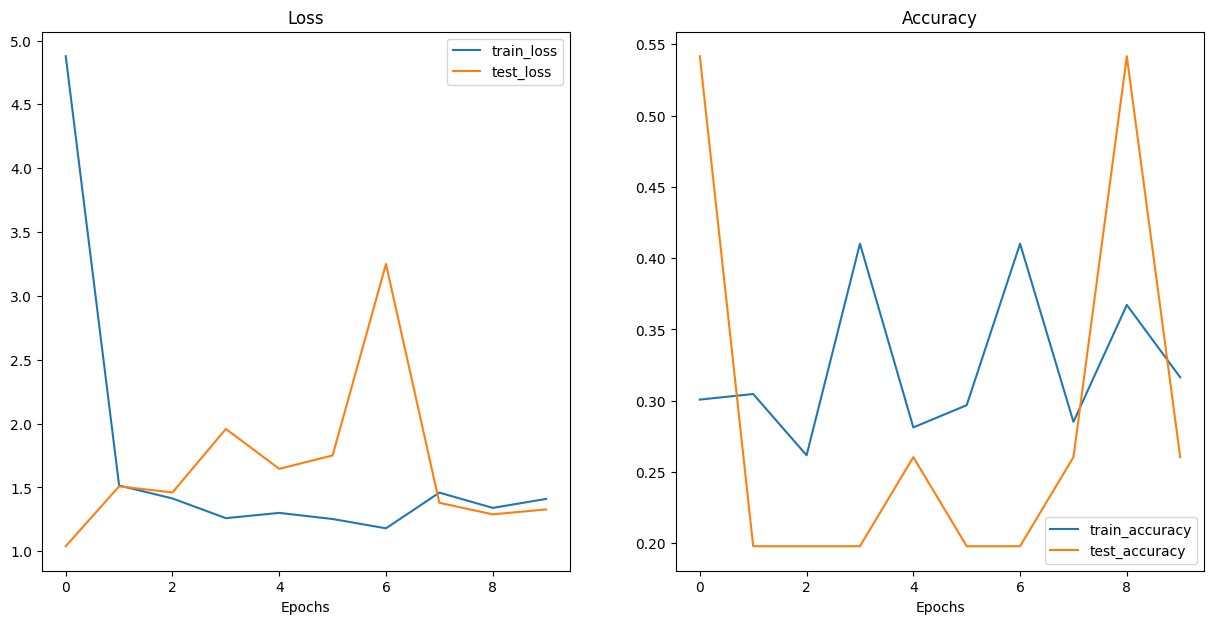

In [ ]:
from helper_functions import plot_loss_curves

plot_loss_curves(results) 

Hmm it looks like our model is underfitting and overfitting... I wonder what techniques we could use to take care of both at the same time?

See more here: https://www.learnpytorch.io/04_pytorch_custom_datasets/#8-what-should-an-ideal-loss-curve-look-like 

<font color="purple">Hmm, it looks like our model's loss curves are all over the place.</font>

<font color="purple">At least the loss looks like it's heading the right direction but the accuracy curves don't really show much promise.

These results are likely because of the difference in data resources and training regime of our ViT model versus the ViT paper.</font>

<font color="purple">It seems our model is severly underfitting (not achieving the results we'd like it to).

How about we see if we can fix that by bringing in a pretrained ViT model?</font>

## 10. Using a pretrained ViT from `torchvision.models`

Generally, in deep learning if you can use a pretrained model from a large dataset on your own problem, it's often a good place to start.

If you can find a pretrained model and use transfer learning, give it a go, it often achieves great results with little data.

<font color="purple">We've discussed the benefits of using pretrained models in [06. PyTorch Transfer Learning](https://www.learnpytorch.io/06_pytorch_transfer_learning/).

But since we've now trained our own ViT from scratch and achieved less than optimal results, the benefits of transfer learning (using a pretrained model) really shine.</font>

### 10.1 Why use a pretrained model?

* Sometimes data is limited
* Limited training resources
* Get better results faster (sometimes)...

<font color="purple">An important note on many modern machine learning research papers is that much of the results are obtained with large datasets and vast compute resources.

And in modern day machine learning, the original fully trained ViT would likely not be considered a "super large" training setup (models are continually getting bigger and bigger).</font>

<font color="purple">Reading the ViT paper section 4.2:

> Finally, the ViT-L/16 model pre-trained on the public ImageNet-21k dataset performs well on most datasets too, while taking fewer resources to pre-train: it could be trained using a standard cloud TPUv3 with 8 cores in approximately **30 days**.</font>

<font color="purple">As of July 2022, the [price for renting a TPUv3](https://cloud.google.com/tpu/pricing) (Tensor Processing Unit version 3) with 8 cores on Google Cloud is $8 USD per hour. 

To rent one for 30 straight days would cost **$5,760 USD**.</font>

<font color="purple">This cost (monetary and time) may be viable for some larger research teams or enterprises but for many people it's not.

So having a pretrained model available through resources like [`torchvision.models`](https://pytorch.org/vision/stable/models.html), the [`timm` (Torch Image Models) library](https://github.com/rwightman/pytorch-image-models), the [HuggingFace Hub](https://huggingface.co/models) or even from the authors of the papers themselves (there's a growing trend for machine learning researchers to release the code and pretrained models from their research papers, I'm a big fan of this trend, many of these resources can be found on [Paperswithcode.com](https://paperswithcode.com/)).</font> 

<font color="purple">If you're focused on leveraging the benefits of a specific model architecture rather than creating your custom architecture, I'd highly recommend using a pretrained model.</font>

In [ ]:
# Cost of a TPUv3 for 30 days
cost = 30*24*8
print(f"Cost of renting a TPUv3 for 30 straight days: ${cost}USD")

Cost of renting a TPUv3 for 30 straight days: $5760USD


### 10.2 Prepare a pretrained ViT for use with FoodVision Mini (turn it into a feature extractor)

<font color="purple">We can get a pretrained ViT model from `torchvision.models`. 

<font color="purple">We'll go from the top by first making sure we've got the right versions of `torch` and `torchvision`.</font>

> **Note:** The following code requires `torch` v0.12+ and `torchvision` v0.13+ to use the latest `torchvision` model weights API.</font>

In [ ]:
# The following requires torch v0.12+ and torchvision 0.13+
import torch
import torchvision
print(torch.__version__)
print(torchvision.__version__)

2.0.0+cu118
0.15.1+cu118


In [ ]:
# import torch
# import torchvision
# print(torch.__version__)
# print(torchvision.__version__)

1.12.0+cu113
0.13.0+cu113


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

<font color="purple">Finally, we'll get the pretrained ViT-Base with patch size 16 from `torchvision.models` and prepare it for our FoodVision Mini use case by turning it into a feature extractor transfer learning model.

<font color="purple">Specifically, we'll:
1. (步驟1)Get the pretrained weights for ViT-Base trained on ImageNet-1k from [`torchvision.models.ViT_B_16_Weights.DEFAULT`](https://pytorch.org/vision/stable/models/generated/torchvision.models.vit_b_16.html#torchvision.models.ViT_B_16_Weights) (`DEFAULT` stands for best available).
2. (步驟2)Setup a ViT model instance via `torchvision.models.vit_b_16`, pass it the pretrained weights step 1 and send it to the target device.
3. (步驟3)Freeze all of the parameters in the base ViT model created in step 2 by setting their `requires_grad` attribute to `False`. 
4. (步驟4)Update the classifier head of the ViT model created in step 2 to suit our own problem by changing the number of `out_features` to our number of classes (pizza, steak, sushi). 

<font color="purple">We covered steps like this in 06. PyTorch Transfer Learning [section 3.2: Setting up a pretrained model](https://www.learnpytorch.io/06_pytorch_transfer_learning/#32-setting-up-a-pretrained-model) and [section 3.4: Freezing the base model and changing the output layer to suit our needs](https://www.learnpytorch.io/06_pytorch_transfer_learning/#34-freezing-the-base-model-and-changing-the-output-layer-to-suit-our-needs).

In [ ]:
# (步驟1) Get pretrained weights for ViT-Base
pretrained_vit_weights = torchvision.models.ViT_B_16_Weights.DEFAULT # "DEFAULT" = best available

# (步驟2) Setup a ViT model instance with pretrained weights
pretrained_vit = torchvision.models.vit_b_16(weights=pretrained_vit_weights).to(device)

# (步驟3) Freeze the base parameters
for parameter in pretrained_vit.parameters():
  parameter.requires_grad = False

pretrained_vit.heads

Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth
100%|██████████| 330M/330M [00:03<00:00, 100MB/s]


Sequential(
  (head): Linear(in_features=768, out_features=1000, bias=True)
)

In [ ]:
# (步驟4) Update the classifier head
set_seeds()
pretrained_vit.heads = nn.Linear(in_features=768, out_features=len(class_names)).to(device)

<font color="purple">Pretrained ViT feature extractor model created!

Let's now check it out by printing a `torchinfo.summary()`.</font>

In [ ]:
from torchinfo import summary

summary(model=pretrained_vit,
        input_size=(1, 3, 224, 224), # (batch_size, color_channels, height, width)
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
VisionTransformer (VisionTransformer)                        [1, 3, 224, 224]     [1, 3]               768                  Partial
├─Conv2d (conv_proj)                                         [1, 3, 224, 224]     [1, 768, 14, 14]     (590,592)            False
├─Encoder (encoder)                                          [1, 197, 768]        [1, 197, 768]        151,296              False
│    └─Dropout (dropout)                                     [1, 197, 768]        [1, 197, 768]        --                   --
│    └─Sequential (layers)                                   [1, 197, 768]        [1, 197, 768]        --                   False
│    │    └─EncoderBlock (encoder_layer_0)                   [1, 197, 768]        [1, 197, 768]        (7,087,872)          False
│    │    └─EncoderBlock (encoder_layer_1)                   [1, 197, 768]        [1, 1

`Conv2d (conv_proj):`
* 768 * 768 (Weight) + 768(Bias)=**590592**

`EncoderBlock:`

1. **MSA**
* (768 * 2 = 1536)  
* (768 * 768 * 4 + 768 * 4 = 2362368) eq1
> 1536 + 2362368 = 2363904

2. **MLP**
* 768*2 = 1536
* 768*3072 + 3072 = 2362368
* 3072*768 + 768 = 2360064
> 1536 + 2362368 + 2360064 = 4723968

>**MSA**+**MLP**=**7087872**

`LayerNorm (ln)`
* 768 * 2 = **1536**

`Linear (heads)`
* 768 * 3 + 3 = **2307**

pos_embedding 151296

eq1來自
768* ( 12*64 ) *3 + 768 * 768 + 768 * 4，12是12個heads的意思



<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/08-vit-paper-summary-output-pytorch-vit.png" alt="output of pytorch pretrained ViT model summary" width=900 />

Woohoo!

<font color="purple">Notice how only the output layer is trainable, where as, all of the rest of the layers are untrainable (frozen).

And the total number of parameters, 85,800,963, is the same as our custom made ViT model above.</font>

<font color="purple">But the number of trainable parameters for `pretrained_vit` is much, much lower than our custom `vit` at only 2,307 compared to 85,800,963 (in our custom `vit`, since we're training from scratch, all parameters are trainable). 

This means the pretrained model should train a lot faster, we could potentially even use a larger batch size since less parameter updates are going to be taking up memory.</font>

### 10.3 Preparing data for the pretrained ViT model

When using a pretrained model, you want to make sure your data is formatted in the same way that the model was trained on. 

<font color="purple">We downloaded and created DataLoaders for our own ViT model back in section 2.

So we don't necessarily need to do it again.</font>

<font color="purple">But in the name of practice, let's download some image data (pizza, steak and sushi images for Food Vision Mini), setup train and test directories and then transform the images into tensors and DataLoaders.

We can download pizza, steak and sushi images from the course GitHub and the `download_data()` function we creating in [07. PyTorch Experiment Tracking section 1](https://www.learnpytorch.io/07_pytorch_experiment_tracking/#1-get-data).</font>

In [ ]:
# Get automtic transforms from pretrained ViT weights
vit_transforms = pretrained_vit_weights.transforms()
vit_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [ ]:
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

In [ ]:
# Setup dataloaders
from going_modular.going_modular import data_setup
train_dataloader_pretrained, test_dataloader_pretrained, class_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                        test_dir=test_dir,
                                                        transform=vit_transforms,
                                                        batch_size=32) # could set a higher batch size because using a pretrained model 

### 10.4 Train feature extractor ViT model

In [ ]:
from going_modular.going_modular import engine

# Create optimizer and loss function
optimizer = torch.optim.Adam(params=pretrained_vit.parameters(),
                             lr=1e-3)
loss_fn = torch.nn.CrossEntropyLoss()

# Train the classifier head of pretrained ViT
set_seeds() 
pretrained_vit_results = engine.train(model=pretrained_vit,
                      train_dataloader=train_dataloader_pretrained,
                      test_dataloader=test_dataloader_pretrained,
                      optimizer=optimizer,
                      loss_fn=loss_fn,
                      epochs=10,
                      device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.7665 | train_acc: 0.7227 | test_loss: 0.5432 | test_acc: 0.8665
Epoch: 2 | train_loss: 0.3428 | train_acc: 0.9453 | test_loss: 0.3263 | test_acc: 0.8977
Epoch: 3 | train_loss: 0.2064 | train_acc: 0.9531 | test_loss: 0.2707 | test_acc: 0.9081
Epoch: 4 | train_loss: 0.1556 | train_acc: 0.9570 | test_loss: 0.2422 | test_acc: 0.9081
Epoch: 5 | train_loss: 0.1246 | train_acc: 0.9727 | test_loss: 0.2279 | test_acc: 0.8977
Epoch: 6 | train_loss: 0.1216 | train_acc: 0.9766 | test_loss: 0.2129 | test_acc: 0.9280
Epoch: 7 | train_loss: 0.0938 | train_acc: 0.9766 | test_loss: 0.2352 | test_acc: 0.8883
Epoch: 8 | train_loss: 0.0797 | train_acc: 0.9844 | test_loss: 0.2281 | test_acc: 0.8778
Epoch: 9 | train_loss: 0.1098 | train_acc: 0.9883 | test_loss: 0.2074 | test_acc: 0.9384
Epoch: 10 | train_loss: 0.0650 | train_acc: 0.9883 | test_loss: 0.1804 | test_acc: 0.9176


<font color="purple">Holy cow! 
Looks like our pretrained ViT feature extractor performed far better than our custom ViT model trained from scratch (in the same amount of time).

Let's get visual.</font>

### 10.5 Plot the loss curves of our pretrained ViT feature extractor model

<font color="purple">Our pretrained ViT feature model numbers look good on the training and test sets.

How do the loss curves look?</font>

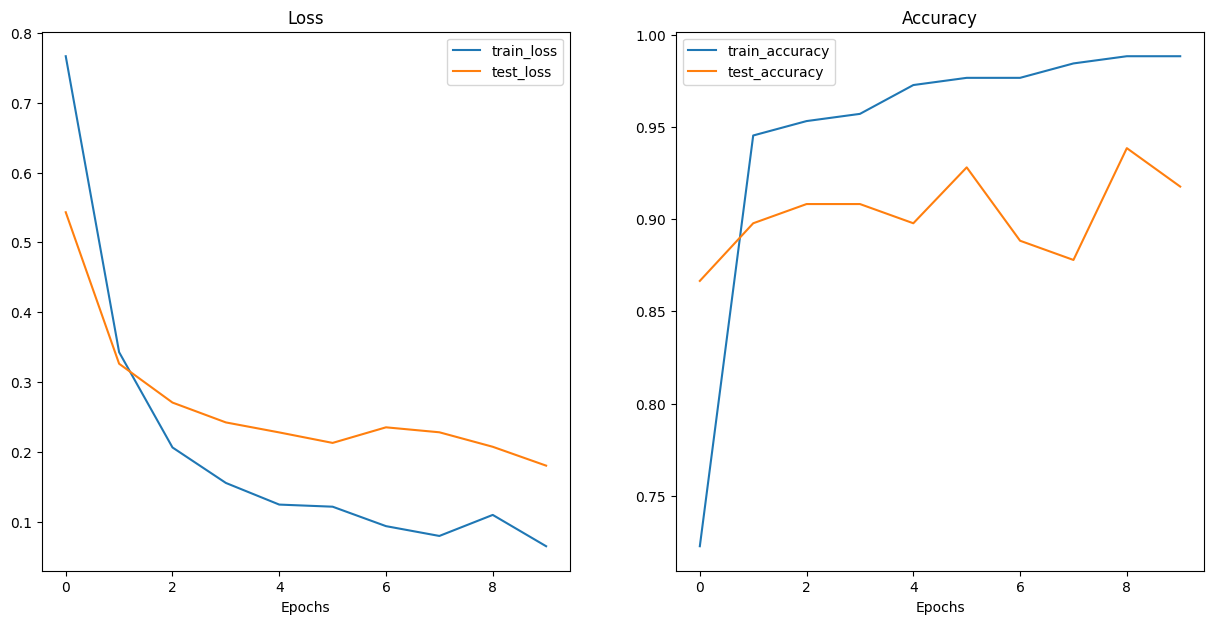

In [ ]:
from helper_functions import plot_loss_curves

plot_loss_curves(pretrained_vit_results)

<font color="purple">Woah!

Those are some close to textbook looking (really good) loss curves (check out 04. PyTorch Custom Datasets section 8 for what an ideal loss curve should look like).</font>

<font color="purple">That's the power of transfer learning!

We managed to get outstanding results with the same model architecture, except our custom implementation was trained from scratch (worse performance) and this feature extractor model has the power of pretrained weights from ImageNet behind it.</font>

<font color="purple">What do you think?

Would our feature extractor model improve more if you kept training it?</font>

### 10.6 Save our best performing ViT model

Now we've got a model that performs quite well, how about we save it to file and then check it's filesize.

We want to check the filesize because if we wanted to deploy a model to say a website/mobile application, we may limitations on the size of the model we can deploy.

E.g. a smaller model may be required due to compute restrictions.

<font color="purple">It looks like our ViT feature extractor model is performing quite well for our Food Vision Mini problem.

<font color="purple">Perhaps we might want to try deploying it and see how it goes in production (in this case, deploying means putting our trained model in an application someone could use, say taking photos on their smartphone of food and seeing if our model thinks its pizza, steak or sushi).

<font color="purple">To do so we can first save our model with the `utils.save_model()` function we created in [05. PyTorch Going Modular section 5](https://www.learnpytorch.io/05_pytorch_going_modular/#5-creating-a-function-to-save-the-model-utilspy).

In [ ]:
# Save the model
from going_modular.going_modular import utils

utils.save_model(model=pretrained_vit,
        target_dir="models",
        model_name="08_pretrained_vit_feature_extractor_pizza_steak_sushi.pth")

[INFO] Saving model to: models/08_pretrained_vit_feature_extractor_pizza_steak_sushi.pth


<font color="purple">And since we're thinking about deploying this model, it'd be good to know the size of it (in megabytes or MB).

Since we want our Food Vision Mini application to run fast, generally a smaller model with good performance will be better than a larger model with great performance.</font>

<font color="purple">We can check the size of our model in bytes using the `st_size` attribute of Python's `pathlib.Path().stat()` method whilst passing it our model's filepath name.

We can then scale the size in bytes to megabytes.</font>

In [ ]:
from pathlib import Path

# Get the model size in bytes then convert to megabytes 
pretrained_vit_model_size = Path("models/08_pretrained_vit_feature_extractor_pizza_steak_sushi.pth").stat().st_size // (1024*1024)
print(f"Pretrained ViT feature extractor model size: {pretrained_vit_model_size} MB")

Pretrained ViT feature extractor model size: 327 MB


Our pretrained ViT gets some of the best results we've seen so far on our FoodVision Mini problem, however, the model size is ~11x larger than our next best performing model.

Perhaps the larger model size might cause issues when we go to deploy it (e.g. hard to deploy such a large file/might not make predictions as fast as a smaller model).

<font color="purple">Hmm, looks like our ViT feature extractor model for Food Vision Mini turned out to be about 327 MB in size.

How does this compare to the EffNetB2 feature extractor model in [07. PyTorch Experiment Tracking section 9](https://www.learnpytorch.io/07_pytorch_experiment_tracking/#9-load-in-the-best-model-and-make-predictions-with-it)?</font>


| >**Model** | **Model size (MB)** | **Test loss** | **Test accuracy** | 
| ----- | ----- | ----- | ------ |
| EffNetB2 feature extractor^ | 29 | ~0.3906 | ~0.9384 | 
| ViT feature extractor | 327 | ~0.1084 | ~0.9384 | 

> <font color="purple">**Note:** ^ the EffNetB2 model in reference was trained with 20% of pizza, steak and sushi data (double the amount of images) rather than the ViT feature extractor which was trained with 10% of pizza, steak and sushi data. An exercise would be to train the ViT feature extractor model on the same amount of data and see how much the results improve.

<font color="purple">The EffNetB2 model is ~11x smaller than the ViT model with similiar results for test loss and accuracy.

However, the ViT model's results may improve more when trained with the same data (20% pizza, steak and sushi data).</font>

<font color="purple">But in terms of deployment, if we were comparing these two models, something we'd need to consider is whether the extra accuracy from the ViT model is worth the ~11x increase in model size? 

Perhaps such a large model would take longer to load/run and wouldn't provide as good an experience as EffNetB2 which performs similarly but at a much reduced size.</font>

## 11. Predicting on a custom image

<font color="purple">And finally, we'll finish with the ultimate test, predicting on our own custom data.

Let's download the pizza dad image (a photo of my dad eating pizza) and use our ViT feature extractor to predict on it.</font>

<font color="purple">To do we, let's can use the `pred_and_plot()` function we created in [06. PyTorch Transfer Learning section 6](https://www.learnpytorch.io/06_pytorch_transfer_learning/#6-make-predictions-on-images-from-the-test-set), for convenience, I saved this function to [`going_modular.going_modular.predictions.py`](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/going_modular/going_modular/predictions.py) on the course GitHub. 

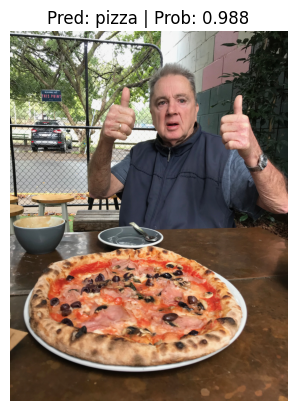

In [ ]:
import requests

# Import function to make predictions on images and plot them 
from going_modular.going_modular.predictions import pred_and_plot_image

# Setup custom image path
custom_image_path = image_path / "04-pizza-dad.jpeg"

# Download the image if it doesn't already exist
if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        # When downloading from GitHub, need to use the "raw" file link
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)
else:
    print(f"{custom_image_path} already exists, skipping download.")

# Predict on custom image
pred_and_plot_image(model=pretrained_vit,
          image_path=custom_image_path,
          class_names=class_names)

<font color="purple"> Two thumbs up! Congratulations!

We've gone all the way from research paper to usable model code on our own custom images!</font>

## <font color="purple">Main takeaways</font>

* <font color="purple">With the explosion of machine learning, new research papers detailing advancements come out every day. And it's impossible to keep up with it *all* but you can narrow things down to your own use case, such as what we did here, replicating a computer vision paper for FoodVision Mini.
* Machine learning research papers are often contain months of research by teams of smart people compressed into a few pages (so teasing out all the details and replicating the paper in full can be a bit of challenge). 
* The goal of paper replicating is to turn machine learning research papers (text and math) into usable code.
    * <font color="purple">With this being said, many machine learning research teams are starting to publish code with their papers and one of the best places to see this is at [Paperswithcode.com](https://paperswithcode.com/)
* Breaking a machine learning research paper into inputs and outputs (what goes in and out of each layer/block/model?) and layers (how does each layer manipulate the input?) and blocks (a collection of layers) and replicating each part step by step (like we've done in this notebook) can be very helpful for understanding.
* Pretrained models are available for many state of the art model architectures and with the power of transfer learning, these often perform *very* well with little data.
* Larger models generally perform better but have a larger footprint too (they take up more storage space and can take longer to perform inference). 
    * <font color="purple">A big question is: deployment wise, is the extra performance of a larger model worth it/aligned with the use case?

## Exercises and extra-curriculum

See exercises and extra-curriculum here: https://www.learnpytorch.io/08_pytorch_paper_replicating/#exercises